In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['jamestown', 'tiznit', 'rikitea', 'bubaque', 'barentsburg', 'tuatapere', 'natal', 'bluff', 'grand gaube', 'avera', 'mataura', 'acapulco', 'gat', 'werda', 'tumannyy', 'sao filipe', 'nantucket', 'hanmer springs', 'albany', 'kavieng', 'ndele', 'ancud', 'east london', 'bredasdorp', 'tulsipur', 'hobart', 'vao', 'hermanus', 'ribeira grande', 'akcakoca', 'lolua', 'teguise', 'meulaboh', 'walvis bay', 'praia da vitoria', 'ridge', 'atuona', 'busselton', 'ushuaia', 'vaini', 'torbay', 'taolanaro', 'ilhabela', 'caucaia', 'dukat', 'nyurba', 'marsassoum', 'amderma', 'katsuura', 'nanortalik', 'dikson', 'havoysund', 'kapaa', 'amahai', 'ndago', 'lasa', 'bethel', 'kruisfontein', 'belushya guba', 'hohhot', 'amapa', 'gurgan', 'saint george', 'new norfolk', 'bengkulu', 'broken hill', 'sistranda', 'balkanabat', 'maragogi', 'gangotri', 'illoqqortoormiut', 'dzhusaly', 'bandarbeyla', 'luwuk', 'butaritari', 'khatanga', 'tilichiki', 'pevek', 'puerto ayora', 'yamada', 'faya', 'daye', 'castro', 'healdsburg', 'punt

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Test for single city
# Build query URL
# Add imperial units argument to query
city = "San Francisco"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
#need to removes spaces from url in the city name and replace with +
query_url = query_url.replace(" ", "+")

print(query_url)

weather_response = requests.get(query_url).json()
print(weather_response)

http://api.openweathermap.org/data/2.5/weather?appid=c101111115b41c09cbb8835f84042b04&q=San+Francisco&units=imperial
{'coord': {'lon': -122.4194, 'lat': 37.7749}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.26, 'feels_like': 49.26, 'temp_min': 42.89, 'temp_max': 54.16, 'pressure': 1027, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 57, 'gust': 5.01}, 'clouds': {'all': 75}, 'dt': 1641816746, 'sys': {'type': 2, 'id': 2017837, 'country': 'US', 'sunrise': 1641828298, 'sunset': 1641863349}, 'timezone': -28800, 'id': 5391959, 'name': 'San Francisco', 'cod': 200}


In [4]:
# Get API response for each cities in cities list and append to list.
responses = []
for city in cities:
# Build query URL
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    #need to removes spaces from url in the city name and replace with +
    query_url = query_url.replace(" ", "+")

    #Get weather data
    weather_response = requests.get(query_url).json()
    #Append response to list
    responses.append(weather_response)
    print(f"Processing Record {cities.index(city)+1} of {len(cities)} | {city}")
    #pause loop for 1 second to stay within API limit of 60 requests per minute
    time.sleep(1.1)

Processing Record 1 of 613 | jamestown
Processing Record 2 of 613 | tiznit
Processing Record 3 of 613 | rikitea
Processing Record 4 of 613 | bubaque
Processing Record 5 of 613 | barentsburg
Processing Record 6 of 613 | tuatapere
Processing Record 7 of 613 | natal
Processing Record 8 of 613 | bluff
Processing Record 9 of 613 | grand gaube
Processing Record 10 of 613 | avera
Processing Record 11 of 613 | mataura
Processing Record 12 of 613 | acapulco
Processing Record 13 of 613 | gat
Processing Record 14 of 613 | werda
Processing Record 15 of 613 | tumannyy
Processing Record 16 of 613 | sao filipe
Processing Record 17 of 613 | nantucket
Processing Record 18 of 613 | hanmer springs
Processing Record 19 of 613 | albany
Processing Record 20 of 613 | kavieng
Processing Record 21 of 613 | ndele
Processing Record 22 of 613 | ancud
Processing Record 23 of 613 | east london
Processing Record 24 of 613 | bredasdorp
Processing Record 25 of 613 | tulsipur
Processing Record 26 of 613 | hobart
Proces

Processing Record 208 of 613 | sciacca
Processing Record 209 of 613 | poronaysk
Processing Record 210 of 613 | bambous virieux
Processing Record 211 of 613 | mega
Processing Record 212 of 613 | paamiut
Processing Record 213 of 613 | mar del plata
Processing Record 214 of 613 | butembo
Processing Record 215 of 613 | cherskiy
Processing Record 216 of 613 | upernavik
Processing Record 217 of 613 | nome
Processing Record 218 of 613 | ranfurly
Processing Record 219 of 613 | ladan
Processing Record 220 of 613 | rincon
Processing Record 221 of 613 | saleaula
Processing Record 222 of 613 | palembang
Processing Record 223 of 613 | lufilufi
Processing Record 224 of 613 | fort payne
Processing Record 225 of 613 | coracora
Processing Record 226 of 613 | tiksi
Processing Record 227 of 613 | puerto maldonado
Processing Record 228 of 613 | banda
Processing Record 229 of 613 | tasiilaq
Processing Record 230 of 613 | presidencia roque saenz pena
Processing Record 231 of 613 | sosnovo-ozerskoye
Processi

Processing Record 409 of 613 | springbok
Processing Record 410 of 613 | lebu
Processing Record 411 of 613 | qafsah
Processing Record 412 of 613 | murgab
Processing Record 413 of 613 | comodoro rivadavia
Processing Record 414 of 613 | san-pedro
Processing Record 415 of 613 | kassala
Processing Record 416 of 613 | lima
Processing Record 417 of 613 | saint-georges
Processing Record 418 of 613 | saint anthony
Processing Record 419 of 613 | callaguip
Processing Record 420 of 613 | bulawayo
Processing Record 421 of 613 | srednekolymsk
Processing Record 422 of 613 | celendin
Processing Record 423 of 613 | matara
Processing Record 424 of 613 | college
Processing Record 425 of 613 | khonuu
Processing Record 426 of 613 | muisne
Processing Record 427 of 613 | kysyl-syr
Processing Record 428 of 613 | pasighat
Processing Record 429 of 613 | dayong
Processing Record 430 of 613 | lagoa
Processing Record 431 of 613 | fraserburgh
Processing Record 432 of 613 | manokwari
Processing Record 433 of 613 | l

Processing Record 613 of 613 | glendive


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export to CSV
#use json_normalize to store the json response into a dataframe
raw_data_df = pd.json_normalize(responses)
#export to csv so we dont have to repeat API requests each time
raw_data_df.to_csv(output_data_file, index=False, header=True)

In [6]:
# Display the DataFrame by calling the stored csv 
city_data_df = pd.read_csv(output_data_file, encoding="ISO-8859-1")
city_data_df

# Get list of columns to manipulate Dataframe
list(city_data_df.columns)

# New dataframe with columns we want
formatted_df = city_data_df[["name", "coord.lat","coord.lon","main.temp_max","main.humidity","clouds.all","wind.speed","sys.country","dt"]]

#Renaming columns
renamed_df = formatted_df.rename(columns={"name":"City","coord.lat":"Lat","coord.lon":"Lng","main.temp_max":"Max Temp","main.humidity":"Humidity","clouds.all":"Cloudiness","wind.speed":"Wind Speed","sys.country":"Country","dt":"Date"})

#take only rows where City column is not NaN value.
renamed_df = renamed_df[renamed_df['City'].notna()]
renamed_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,18.72,59.0,100.0,11.99,US,1.641817e+09
1,Tiznit Province,29.5833,-9.5000,62.19,20.0,100.0,3.18,MA,1.641817e+09
2,Rikitea,-23.1203,-134.9692,76.78,79.0,100.0,14.74,PF,1.641817e+09
3,Bubaque,11.2833,-15.8333,80.67,44.0,80.0,21.68,GW,1.641817e+09
5,Tuatapere,-46.1333,167.6833,59.83,95.0,97.0,1.63,NZ,1.641817e+09
...,...,...,...,...,...,...,...,...,...
608,Lakes Entrance,-37.8811,147.9810,69.57,94.0,49.0,2.15,AU,1.641818e+09
609,Heraclea,37.5133,34.0467,50.11,41.0,28.0,3.69,TR,1.641818e+09
610,Gmina Strzelin,50.7816,17.0648,38.39,74.0,100.0,5.57,PL,1.641818e+09
611,Lisala,2.1500,21.5167,101.73,23.0,93.0,2.80,CD,1.641818e+09


In [7]:
renamed_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.693132,16.963232,51.735573,71.917563,60.908602,8.014821,1.641817e+09
std,33.272326,90.397902,32.256655,21.935118,38.650260,6.308218,2.178509e+02
min,-54.800000,-179.166700,-40.680000,7.000000,0.000000,0.000000,1.641817e+09
25%,-7.874325,-63.042525,31.000000,61.000000,20.000000,3.695000,1.641817e+09
50%,23.896700,22.305750,62.350000,76.500000,75.000000,6.475000,1.641817e+09
75%,46.664600,96.941675,76.990000,88.000000,99.000000,10.310000,1.641818e+09
max,78.218600,179.316700,104.340000,100.000000,100.000000,44.720000,1.641818e+09


## Latitude vs. Temperature Plot

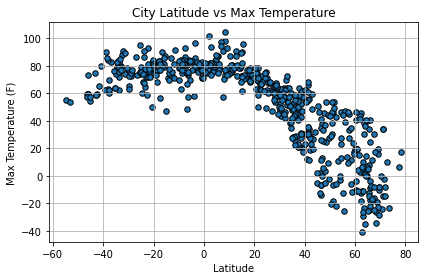

In [8]:
renamed_df.plot(kind="scatter", x="Lat", y="Max Temp", edgecolor="black", s=30)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/fig1.png")
plt.show()



* Code is analysing the relationship between Latitude and Max Temperature by plotting the values from the Latitude column against the values in the Max Temperature column from the renamed_df DataFrame

## Latitude vs. Humidity Plot

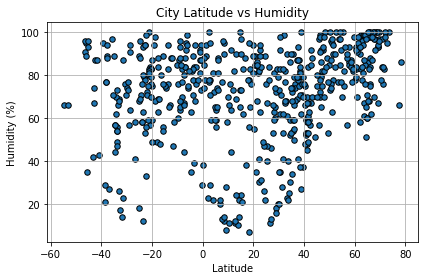

In [9]:
renamed_df.plot(kind="scatter", x="Lat", y="Humidity", edgecolor="black", s=30)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/fig2.png")
plt.show()



* Code is analysing the relationship between Latitude and Humidity by plotting the values from the Latitude column against the values in the Humidity column from the renamed_df DataFrame

## Latitude vs. Cloudiness Plot

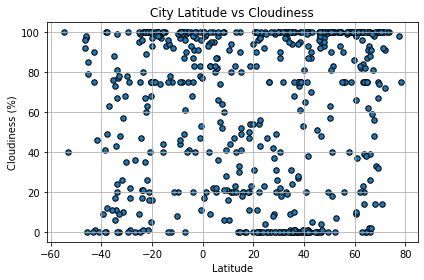

In [10]:
renamed_df.plot(kind="scatter", x="Lat", y="Cloudiness", edgecolor="black", s=30)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/fig3.png")
plt.show()

* Code is analysing the relationship between Latitude and Cloudiness by plotting the values from the Latitude column against the values in the Cloudiness column from the renamed_df DataFrame

## Latitude vs. Wind Speed Plot

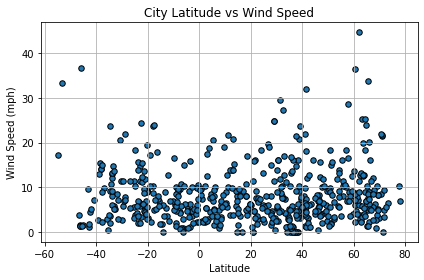

In [11]:
renamed_df.plot(kind="scatter", x="Lat", y="Wind Speed", edgecolor="black", s=30)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()
plt.savefig("output_data/fig4.png")
plt.show()

* Code is analysing the relationship between Latitude and Wind Speed by plotting the values from the Latitude column against the values in the Wind Speed column from the renamed_df DataFrame

## Linear Regression

### Please Note, when notebook is run city data changes and the plots below can change leading to the analysis and conclusions written underneath each plot to be incorrect.

In [12]:
## make a northern hemisphere and southern hemisphere dataframe
north_hemi_df = renamed_df.loc[renamed_df["Lat"] >= 0]
#check to see if latitudes are 0 or greater
north_hemi_df.describe()

south_hemi_df = renamed_df.loc[renamed_df["Lat"] < 0]
#check to see if latitudes are less than 0
south_hemi_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.00000,1.760000e+02
mean,-21.154755,28.944791,75.467045,71.823864,63.750000,7.93517,1.641817e+09
std,13.068031,95.646664,9.433159,19.611591,36.214204,6.00554,2.219873e+02
min,-54.800000,-175.200000,47.280000,12.000000,0.000000,0.00000,1.641817e+09
25%,-31.640625,-54.744550,71.642500,62.750000,32.750000,3.79000,1.641817e+09
50%,-21.043650,27.686700,76.880000,76.000000,75.000000,6.46500,1.641817e+09
75%,-8.919400,129.434750,81.135000,87.000000,98.000000,10.36000,1.641818e+09
max,-0.247900,173.883300,96.390000,100.000000,100.000000,36.82000,1.641818e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

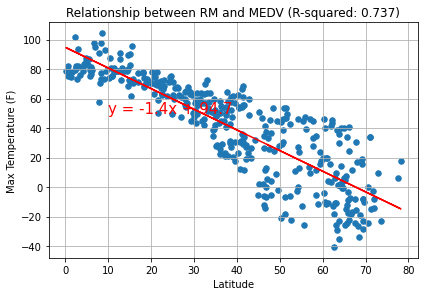

In [13]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", s=30)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,50),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

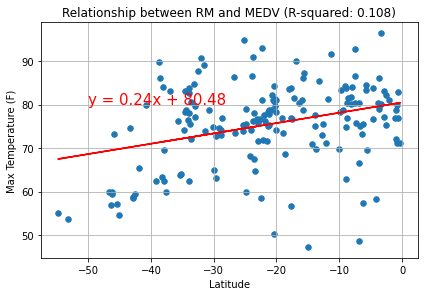

In [14]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", s=30)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

* The Northern hemisphere linear regression line shows a moderate negative correlation between latitude and max temp. This indicates as latitude increases, temperature decreases.

* The Southern hemisphere linear regression line indicates a moderate positve correlation between Latitude and max temp, indidicate that as Latitude increases, Max temperature also increases.

* Both plots are congruent in that the closer the location to the equator (latitude of 0) the greater the Max Temp.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

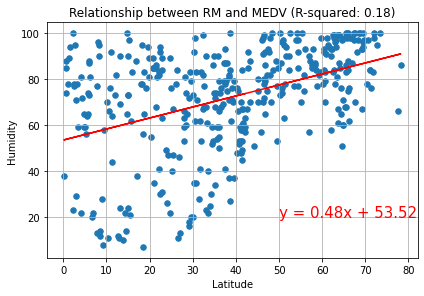

In [15]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", s=30)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

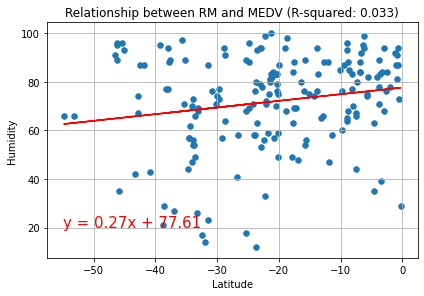

In [16]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", s=30)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")
plt.show()

* Both northern and southern hemisphere plots indicate there is little to no correlation between the Latitude and the Humidity, indicating whether a city is closer to the equator does not have a direct effect on the Humidity level.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

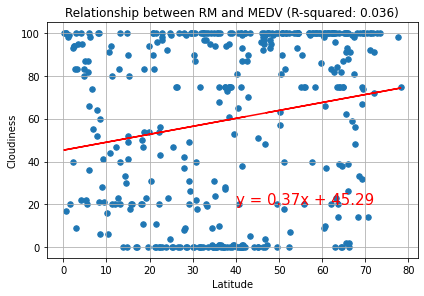

In [17]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=30)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

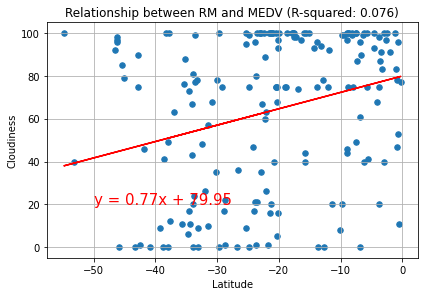

In [18]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=30)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

* Both northern and southern hemisphere plots indicate there is little to no correlation between the Latitude and the Cloudiness, indicating whether a city is closer to the equator does not have a direct effect on the Cloudiness level.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

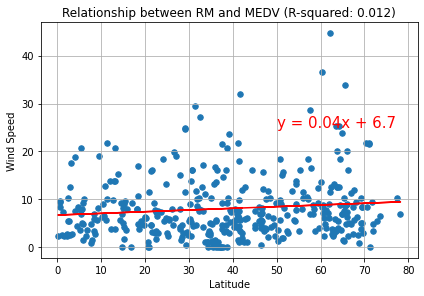

In [19]:
north_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

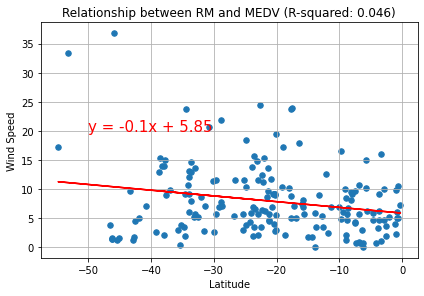

In [20]:
south_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.tight_layout()

# Define scatter values for x and y axis
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

plt.show()

* Both northern and southern hemisphere plots indicate there is little to no correlation between the Latitude and the Wind Speed, indicating whether a city is closer to the equator does not have a direct effect on the Wind Speed.